 <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

 <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

 <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<font color=red>**Dataset**

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

**<font color=red>1.Reading and Inspection**

In [ ]:
url = "/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings (2).csv"
hotel = pd.read_csv(url)

In [ ]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
(hotel.shape)

(119390, 32)

In [ ]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

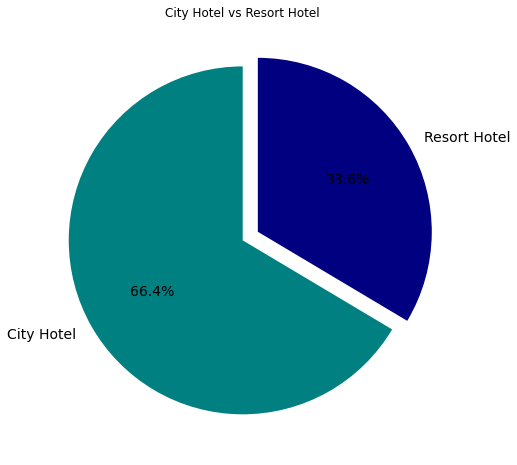

In [ ]:
plt.rcParams['figure.figsize'] = 8,8
labels = hotel['hotel'].value_counts().index.tolist()
sizes = hotel['hotel'].value_counts().tolist()
explode = (0, 0.1)
colors = ['teal', 'navy']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.title('City Hotel vs Resort Hotel')
plt.show()

**<font color=red>2. Cleaning the Data**


In [ ]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Column-wise null percentage

round(100*(hotel.isnull().sum()/len(hotel.index)),2)

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


**The dataset contains Missing values .
Drop unecessary columns:
Lets drop columns with high missing values.**

In [ ]:
hotel['country'].fillna('others', inplace=True)

In [ ]:
hotel= hotel.drop(['agent','company'],axis=1)

**Country has 488 rows with the NaN values. 488 rows out of 119390 is negligible hence we will just remove.**

In [ ]:
hotel = hotel.dropna(axis = 0)
hotel.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**No more missing values in the data**

**Lets Rename the columns for better readability**

In [ ]:
hotel.columns = ['Hotel', 'Canceled', 'LeadTime', 'ArrivingYear', 'ArrivingMonth', 'ArrivingWeek','ArrivingDate', 'WeekendStay',
              'WeekStay', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'DistChannel','RepeatGuest', 'PrevCancel',
              'PrevBook', 'BookRoomType','AssignRoomType', 'ChangeBooking', 'DepositType', 'WaitingDays', 
              'CustomerType', 'ADR','ParkSpace', 'SpecialRequest','Reservation', 'ReservationDate']

In [ ]:
hotel

,Hotel,Canceled,LeadTime,ArrivingYear,ArrivingMonth,ArrivingWeek,ArrivingDate,WeekendStay,WeekStay,Adults,...,AssignRoomType,ChangeBooking,DepositType,WaitingDays,CustomerType,ADR,ParkSpace,SpecialRequest,Reservation,ReservationDate
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


**<font color=red>3. Data Preparation**

In [ ]:
#Lets combine children and babies together as kids
hotel['Kids'] = hotel.Children + hotel.Babies

#Combine total mumbers by adding kids and adults
hotel['total_members'] = hotel.Kids + hotel.Adults

In [ ]:
#convert the datatypes to string
hotel['ArrivingYear'] = hotel['ArrivingYear'].astype('str')
hotel['ArrivingMonth'] = hotel['ArrivingMonth'].astype('str')
hotel['ArrivingDate'] = hotel['ArrivingDate'].astype('str')

hotel['Canceled'] = hotel['Canceled'].astype('str')
hotel['RepeatGuest'] = hotel['RepeatGuest'].astype('str')

In [ ]:
# Lets convert arrival date to datetime
hotel['Arrival Date'] = hotel['ArrivingDate'] + '-' + hotel['ArrivingMonth'] + '-' + hotel['ArrivingYear']
hotel['Arrival Date'] = pd.to_datetime(hotel['Arrival Date'], errors='coerce')

In [ ]:
confirmed_bookings = hotel[hotel.Canceled=='0']

In [ ]:
import datetime as dt
confirmed_bookings['ArrivingMonth'] = hotel['Arrival Date'].dt.month
final=confirmed_bookings['ArrivingMonth'].value_counts().sort_index()
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1     4122
2     5372
3     6645
4     6565
5     7114
6     6404
7     7919
8     8638
9     6392
10    6914
11    4672
12    4409
Name: ArrivingMonth, dtype: int64

<font color=red>**3. EDA**

<font color=orange>**Cancelations**

In [ ]:
print('Total Bookings canceled')
print('-'*50)
print(hotel.Canceled.value_counts())
print('-'*50)
print('*'*75)
print('Cancelation percentage in both hotels ')
print('-'*50)
print(hotel.Canceled.value_counts(normalize=True))

Total Bookings canceled
--------------------------------------------------
0    75166
1    44220
Name: Canceled, dtype: int64
--------------------------------------------------
***************************************************************************
Cancelation percentage in both hotels 
--------------------------------------------------
0    0.629605
1    0.370395
Name: Canceled, dtype: float64



44153 bookings were canceled which is around 37%

<font color=orange>**Country**

In [ ]:
hotel.Country.value_counts(normalize=True)

PRT    0.406966
GBR    0.101595
FRA    0.087238
ESP    0.071767
DEU    0.061037
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: Country, Length: 178, dtype: float64

Around 40% of all bookings were booked from Portugal followed by Great Britain(10%) & France(8%).

<font color=orange>**Month**

In [ ]:
hotel.ArrivingMonth.value_counts(normalize=True)

August       0.116203
July         0.106051
May          0.098764
October      0.093478
April        0.092884
June         0.091627
September    0.088017
March        0.082036
February     0.067579
November     0.056908
December     0.056791
January      0.049662
Name: ArrivingMonth, dtype: float64

August is the most occupied (busiest) month with 11.62% bookings and January is the most unoccupied month with 4.96% bookings.

<font color=orange>**Year**

In [ ]:
hotel.ArrivingYear.value_counts(normalize=True)

2016    0.474989
2017    0.340802
2015    0.184209
Name: ArrivingYear, dtype: float64

47% bookings were done in 2016, 34% in 2017 and 18 percent in 2015.. We can see increasing tendency in bookings year wise

<font color=orange>**Market Segment**

In [ ]:
hotel.Segment.value_counts(normalize=True)

Online TA        0.473054
Offline TA/TO    0.202863
Groups           0.165941
Direct           0.105582
Corporate        0.044352
Complementary    0.006224
Aviation         0.001985
Name: Segment, dtype: float64

Around 47% of bookings are made via Online Travel Agents, almost 20% of bookings are made via Offline Travel Agents and less than 20% are Direct bookings without any other agents.

<font color=orange>Deposit Type

In [ ]:
hotel.DepositType.value_counts(normalize=True)

No Deposit    0.876460
Non Refund    0.122184
Refundable    0.001357
Name: DepositType, dtype: float64

87.6% of the bookings are done without any Deposit

12.2% of the bookings are done with Non-Refundable Deposit and 1.3% are Refundable Deposits

<font color=orange>**Meal**

In [ ]:
hotel.Meal.value_counts(normalize=True)

BB           0.773173
HB           0.121145
SC           0.089206
Undefined    0.009792
FB           0.006684
Name: Meal, dtype: float64

Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.2%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board).

<font color=orange>**Customer Type**

In [ ]:
hotel.CustomerType.value_counts(normalize=True)

Transient          0.750616
Transient-Party    0.210410
Contract           0.034141
Group              0.004833
Name: CustomerType, dtype: float64

Transient type of customers are the more around 75%

In [ ]:
hotel.Reservation.value_counts(normalize=True)

Check-Out    0.629605
Canceled     0.360285
No-Show      0.010110
Name: Reservation, dtype: float64

We can see 63% visitors checked out and 36% bookings were canceled

<font color=red>**4. Data Visualization**

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

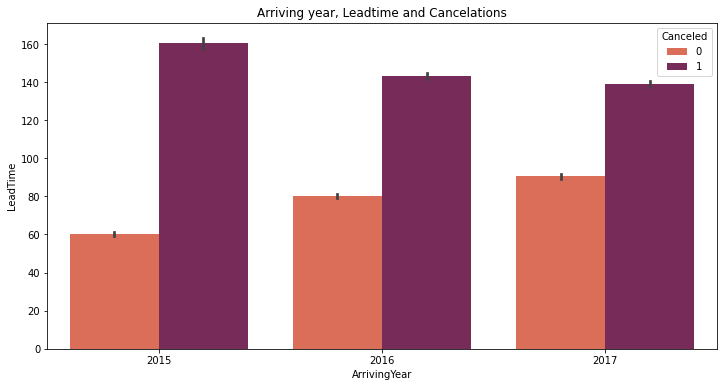

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='ArrivingYear', y='LeadTime',hue='Canceled', data= hotel, palette="rocket_r")
plt.title('Arriving year, Leadtime and Cancelations')

For all the 3 years, bookings with a lead time less than 100 days have fewer chances of getting canceled, and lead time more than 100 days have more chances of getting canceled.

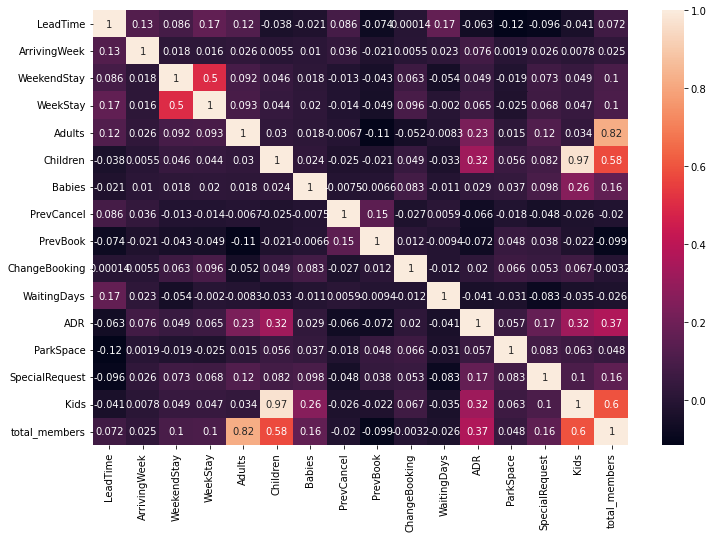

In [ ]:
#Lets see the correlation
plt.figure(figsize=(12,8))
sns.heatmap(hotel.corr(),annot=True,cmap="rocket")



**<font color=orange>Canceled**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


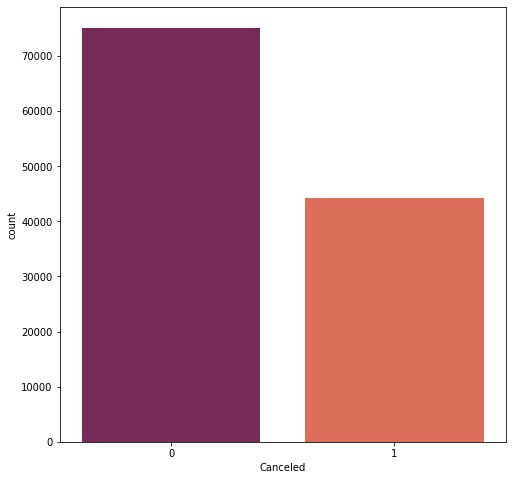

In [ ]:
#Canceled=1, Not canceled= 0
canceled_data = hotel['Canceled']
sns.countplot(canceled_data, palette="rocket")

plt.show()

Majority of bookings were not canceled, still some half of the bookings were canceled

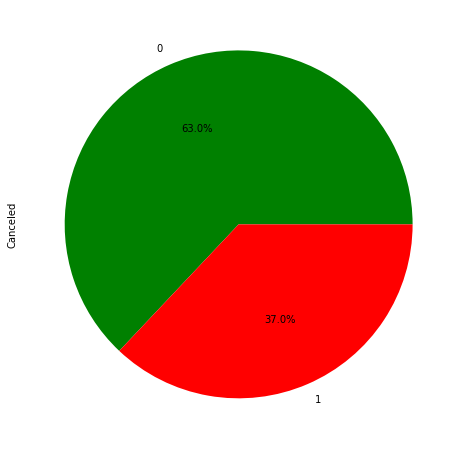

In [ ]:
cols = ['green', 'red']
hotel['Canceled'].value_counts().plot.pie(autopct='%1.1f%%', colors=cols)

According to the pie chart, 63% of bookings were not canceled and 37% of the bookings were canceled at the Hotel.

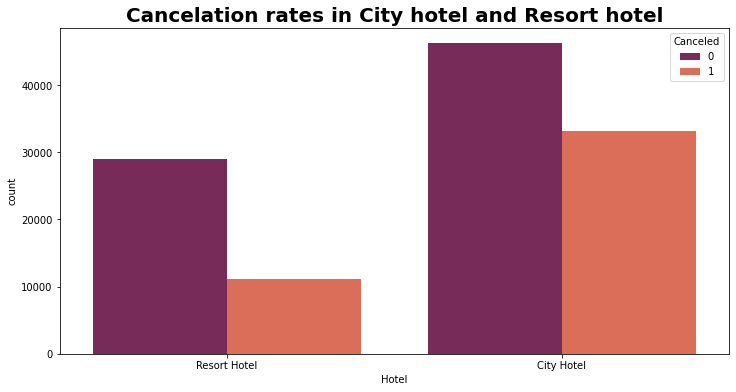

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Hotel',hue="Canceled", data=hotel,palette="rocket")
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=20)
plt.show()



* Most bookings were in city hotel
* Cancelations in Resort hotel is less compared to city hotel



**<font color=orange>Arrivals in month and year**

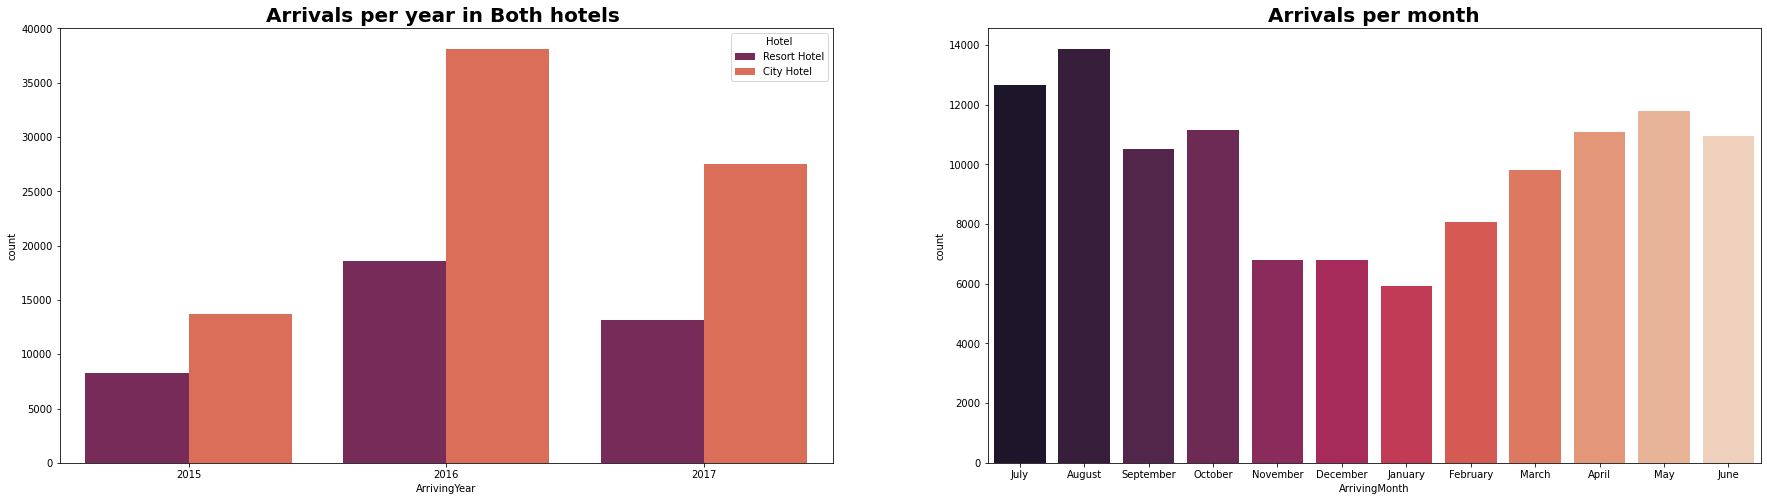

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='ArrivingYear',hue='Hotel', data=hotel,palette='rocket')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'ArrivingMonth',palette='rocket')
plt.title('Arrivals per month',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()



*   We can see most of the bookings were in the year 2016 and bookings were doine in City hotel
*  Most bookings were done in the month of May,June, July, August
add Codeadd Markdown



**<font color=orange>Arrivarl Date**

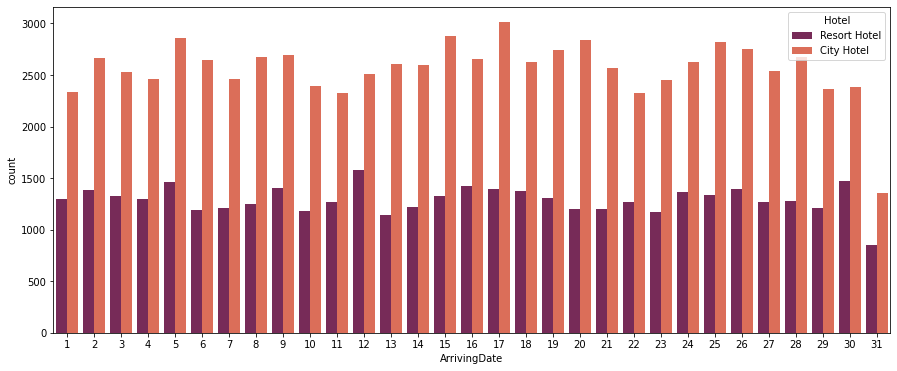

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(data = hotel, x = 'ArrivingDate', hue='Hotel', palette='rocket')
plt.show()



*   Month end day has very less arrivals

*  Bookings are more in City hotel



**<font color=orange>Weekend Stay**

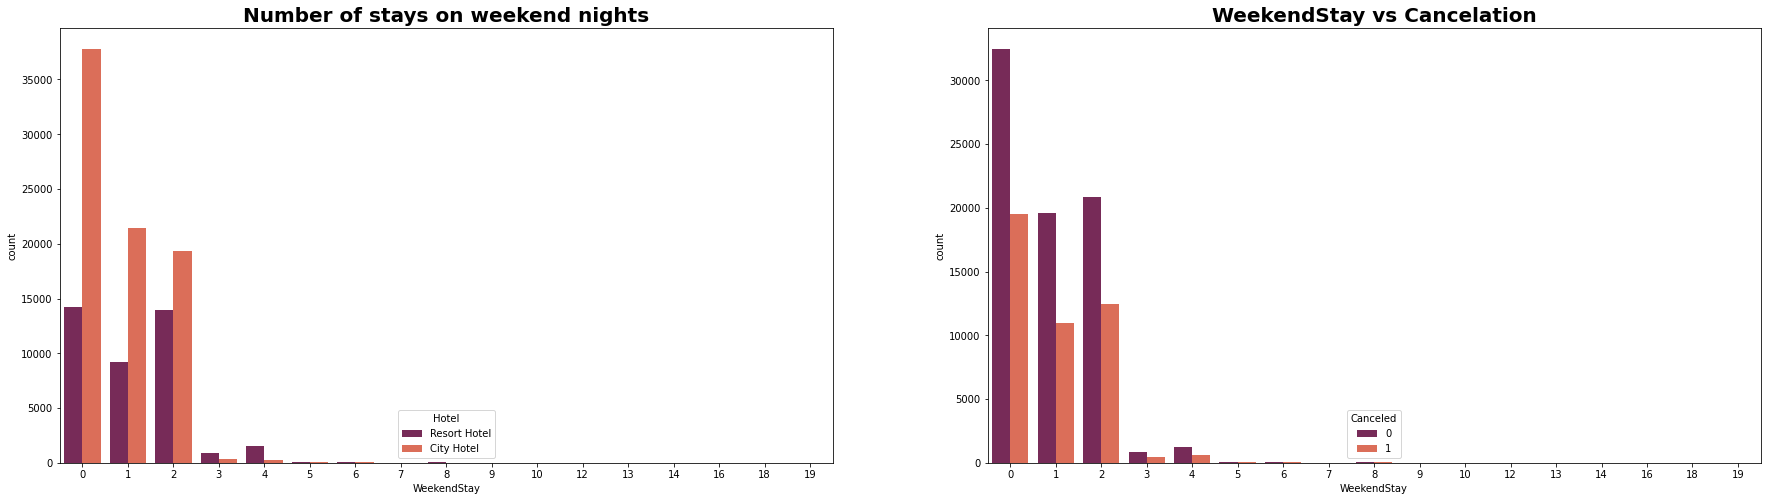

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekendStay',hue='Hotel', data=hotel, palette='rocket')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekendStay', hue='Canceled', palette='rocket')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

plt.show()



*   In the first graph we can see that most of the weekend nights were booked in City Hotel
*   Second plot shows most of weekend nights which were booked were not canceled



**<font color=orange>WeekStay**

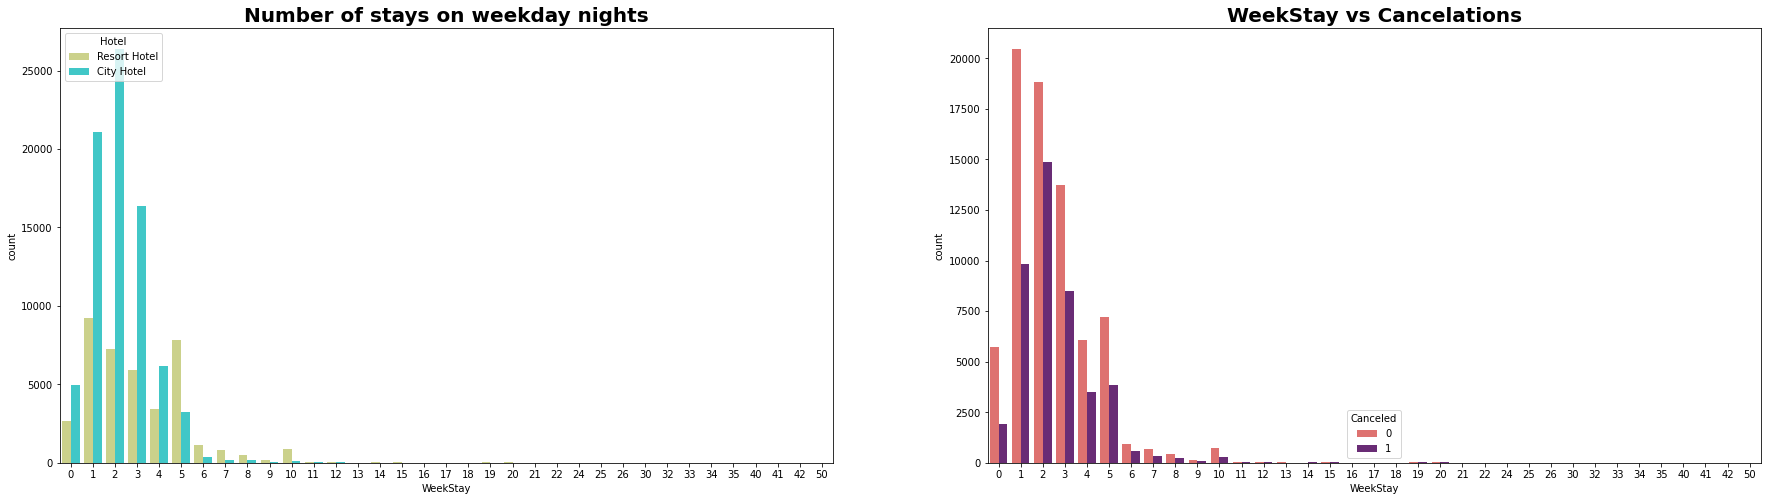

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='WeekStay',hue='Hotel', data=hotel, palette='rainbow_r')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'WeekStay', hue='Canceled', palette='magma_r')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()



*   Weekday night stays were more in City Hotel
*   Less cancelations were observed



**<font color=orange>Adults**

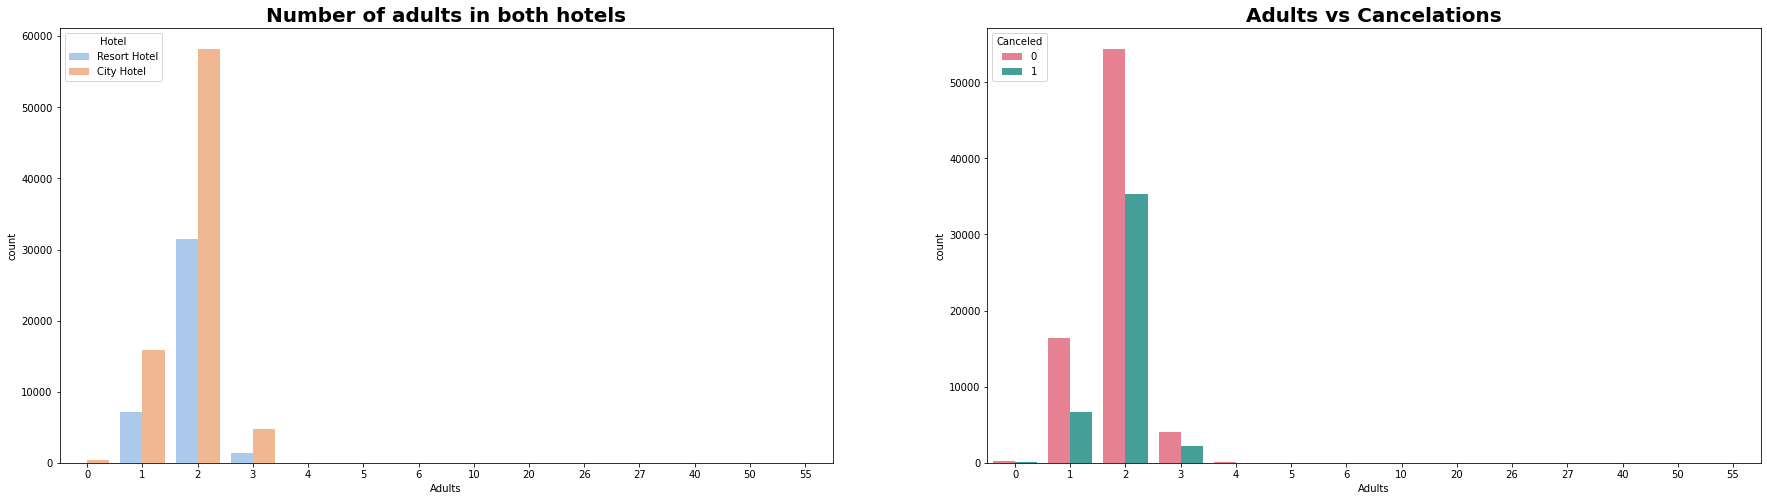

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Adults',hue='Hotel', data=hotel, palette='pastel')
plt.title("Number of adults in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Adults', hue='Canceled', palette='husl')
plt.title('Adults vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

Adults who were 2 in number are more and preferred city hotel rather than resort hotel, infact more than half the visitors even canceled the bookings

**<font color=orange>Children**

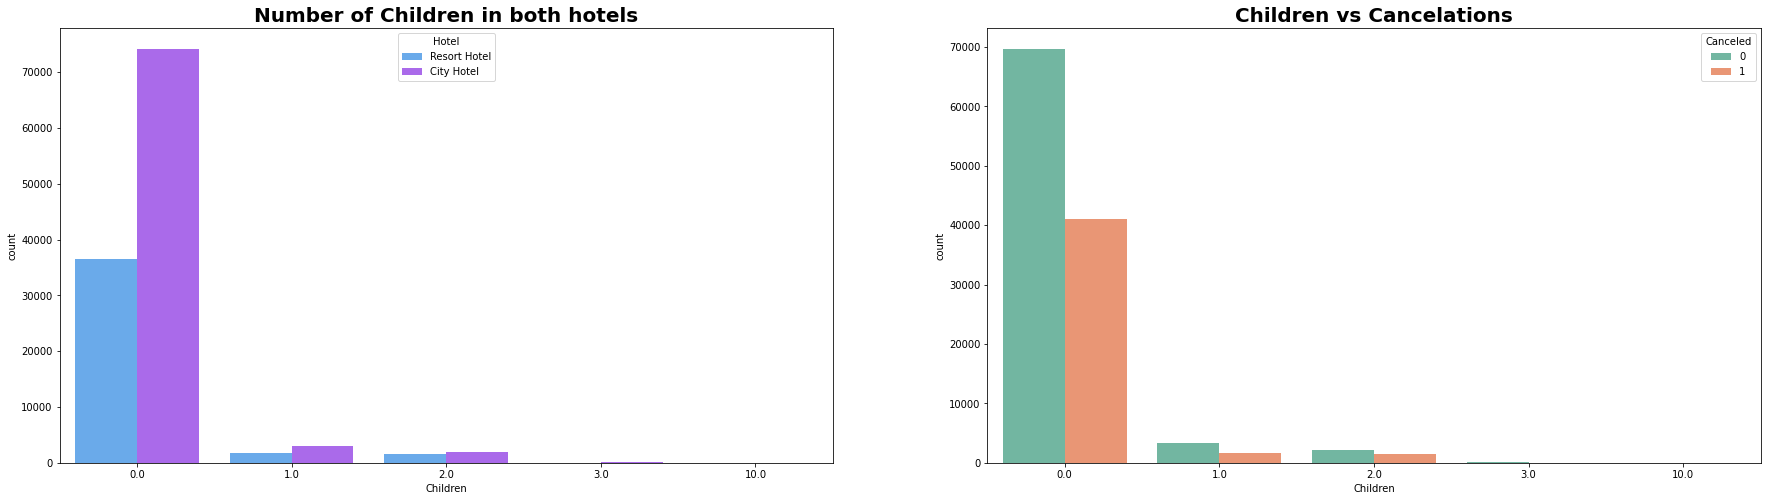

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Children',hue='Hotel', data=hotel, palette='cool')
plt.title("Number of Children in both hotels",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Children', hue='Canceled', palette='Set2')
plt.title('Children vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

**<font color=orange>Babies**

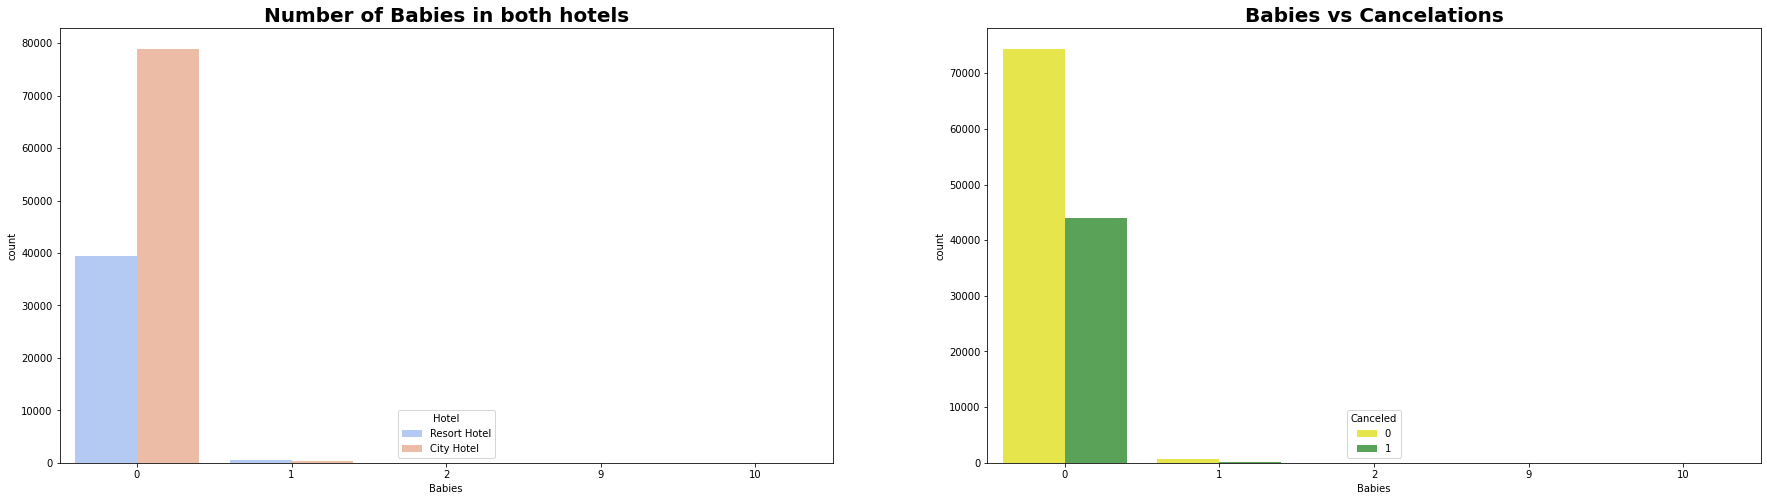

In [ ]:

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Babies',hue='Hotel', data=hotel, palette='coolwarm')
plt.title("Number of Babies in both hotels",fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'Babies', hue='Canceled', palette='Set1_r')
plt.title('Babies vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()



*   Most visitors were arrived in pair with no children/ Babies and preferred City hotel over resort hotel

*  visitors who had 1 or 2 children also preferred city hotel



**<font color= orange>Country**

In [ ]:

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
country_visitors = hotel[hotel['Canceled'] == '0'].groupby(['Country']).size().reset_index(name = 'count')


import plotly.express as px

px.choropleth(country_visitors,
                    locations = "Country",
                    color= "count" ,
                    hover_name= "Country", # column to add to hover information
                    color_continuous_scale="Viridis",
                    title="Home country of visitors")

More visitors are from western europe, namely France,UK and Portugal being the highest.

**<font color=orange>Market**

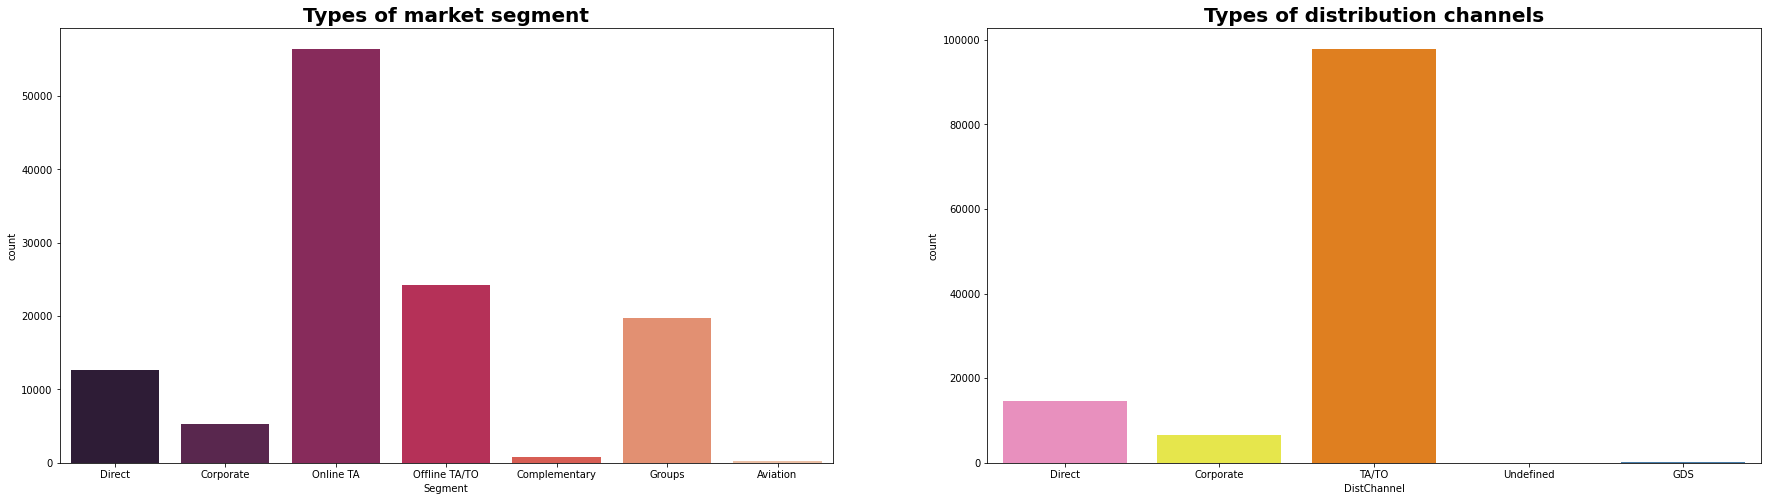

In [ ]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='Segment', data=hotel, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = hotel, x = 'DistChannel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)



plt.show()

Majority DIstribution channels and Market segment were Travel agencies wither offline/online. So better focus more on this

**<font color=orange>Deposit**

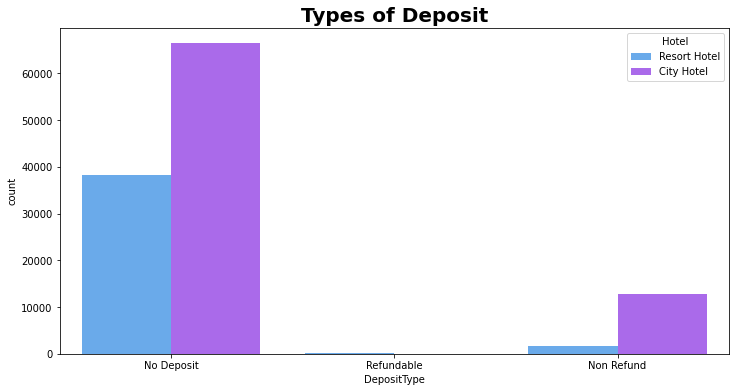

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(data = hotel, x = 'DepositType',hue='Hotel', palette='cool')
plt.title('Types of Deposit',fontweight="bold", size=20)


plt.show()

There was no deposit for City hotel where as Resorts had some deposits. No deposit may lead to cancel the bookings

<font color=orange>Repeat **guest**

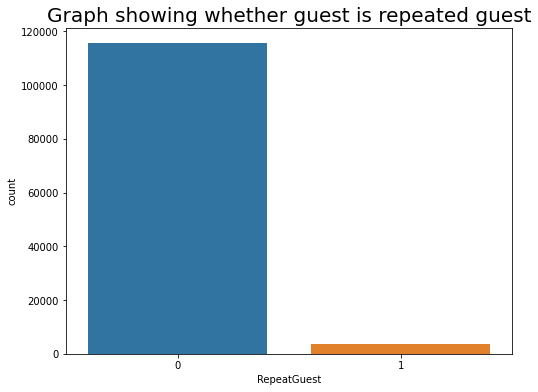

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data = hotel, x = 'RepeatGuest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()



*   Low number of repeated guests.

*  A need to target repeated guests since they have booked before. 



 <font color=green>Looking into prices per month per hotel
- average daily rate = $ \frac{Sum Of All Lodging Transaction}{Total Number Of Staying Night}$
    
- average daily rate per person =  $ \frac{ADR}{Adults + Children}$
    
- We will need to find out average daily rate per person

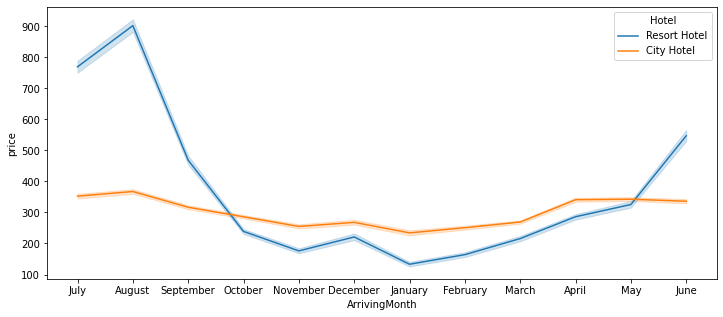

In [ ]:
# Resizing plot 
plt.figure(figsize=(12,5))

# Calculating average daily rate per person
hotel['adr_pp'] = hotel['ADR'] / (hotel['Adults'] + hotel['Children']) 
actual_guests = hotel.loc[hotel["Canceled"] == '0']
actual_guests['price'] = actual_guests['ADR'] * (actual_guests['WeekendStay'] + actual_guests['WeekStay'])
sns.lineplot(data = actual_guests, x = 'ArrivingMonth', y = 'price', hue = 'Hotel')
plt.show()

Prices of Resort Hotel are much higher and fluctuates timely durig the months.

Prices of City Hotel do not fluctuate that much.

**<font color=orange>ADR: Average Daily Rate**

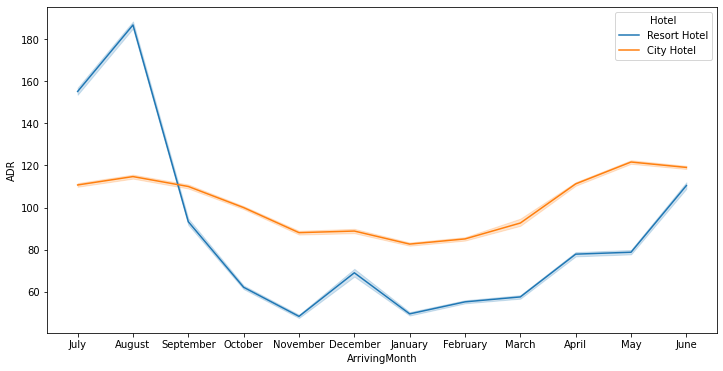

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='ArrivingMonth', y='ADR', hue='Hotel', data= hotel)
plt.show()

For Resort Hotel, ADR is more expensive during July, August & September and for City Hotel, ADR is slightly more during March, April & May.

# <font color=orange>**Summary**

**<font color=red>   Majority of the hotels booked are city hotel. Definitely need to spend the most targeting fund on those hotel.**
- <font color=green>We also realised that the high rate of cancellations can be high due to no deposit policies. 
-<font color=green>We should also target months between May to Aug. Those are peak months due to the summer period.
-<font color=green>Majority of the guests are from Western Europe. We should spend a significant amount of our budget on those area.
-<font color=green>Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests.   

**<font color=red> Strategies to Counter High Cancellations at the Hotel**

-   <font color=green>Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.
-   <font color=green>Encourage Direct bookings by offering special discounts
-   <font color=green>Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.